# Data Preprocessing and Feature Engineering 


# Power Transformer

### Yeo-johnson

### Box-Cox


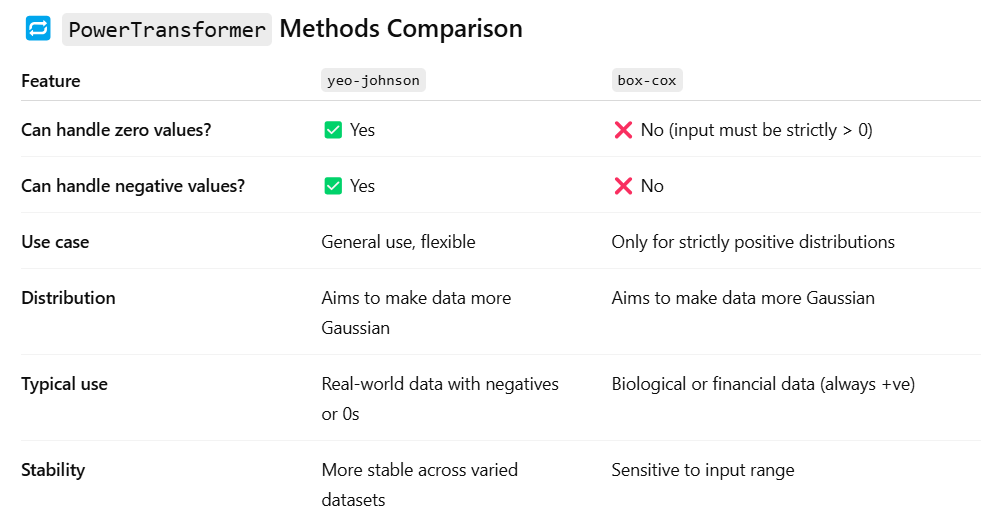




















# Load Dataset

In [14]:
import pandas as pd 

df = pd.read_csv("lec 23 concrete data.csv")
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


# Train Test Split

In [15]:
from sklearn.model_selection import train_test_split

df = df[['Cement','Water','Age','Strength']]


X_train, X_test, y_train, y_test = train_test_split(df.drop('Strength',axis=1), df['Strength'], test_size=0.2, random_state=42)

array([[<Axes: title={'center': 'Cement'}>,
        <Axes: title={'center': 'Water'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Strength'}>]], dtype=object)

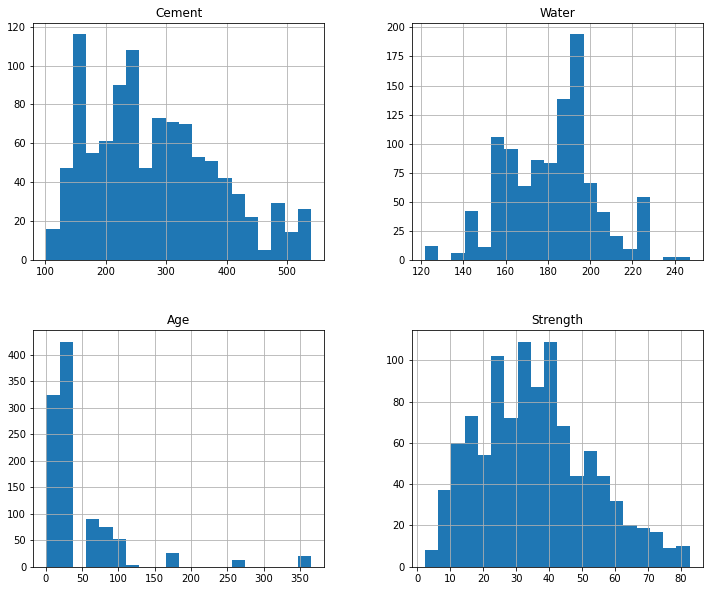

In [16]:
df.hist(figsize=(12,10),bins=20)

# Train Model Without Power Tranformer

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2_score(y_test, y_pred)

np.float64(0.5003324674025951)

# Applying Power Transformer


### 1 yeo-johnson:

'yeo-johnson' works for both positive and negative data

### 2  box-cox: 

but it only works on positive data.

In [17]:
from sklearn.preprocessing import PowerTransformer


# Initialize PowerTransformer
pt = PowerTransformer(method='yeo-johnson')  # 'yeo-johnson' works for both positive and negative data

# Fit on training data and transform both train and test
X_train_transformed = pt.fit_transform(X_train)
X_test_transformed = pt.transform(X_test)

X_test_transformed

array([[-0.00715963,  2.12255489,  2.47621602],
       [ 0.81319633, -0.78748251, -1.05331163],
       [ 1.01199914, -1.71073938,  0.10577763],
       [ 0.81319633, -0.78748251, -1.664976  ],
       [-1.48865401,  0.9490788 ,  0.10577763],
       [ 0.09197354, -0.08975563,  0.10577763],
       [-1.42559964,  0.53501087,  0.10577763],
       [-0.14779555, -1.70088385,  1.25751143],
       [-0.57305636, -1.05212872,  0.10577763],
       [ 1.03384233,  0.48873521,  1.16018129],
       [ 0.41807471, -0.16505063,  0.10577763],
       [-1.11148636,  0.19592247, -1.05331163],
       [ 1.52950259, -2.11252627, -1.664976  ],
       [ 0.50746234,  0.10717288, -1.05331163],
       [-1.06712186, -0.79227616, -0.49126177],
       [-0.39886348,  0.19592247, -1.05331163],
       [ 0.46015263,  1.31362431,  0.10577763],
       [-0.16404789,  1.01767775, -1.05331163],
       [ 0.05990733,  1.31362431,  0.10577763],
       [-1.1864936 , -0.30191672, -0.49126177],
       [ 0.05801087,  0.19592247,  0.105

array([[<Axes: title={'center': 'Cement'}>,
        <Axes: title={'center': 'Water'}>],
       [<Axes: title={'center': 'Age'}>, <Axes: >]], dtype=object)

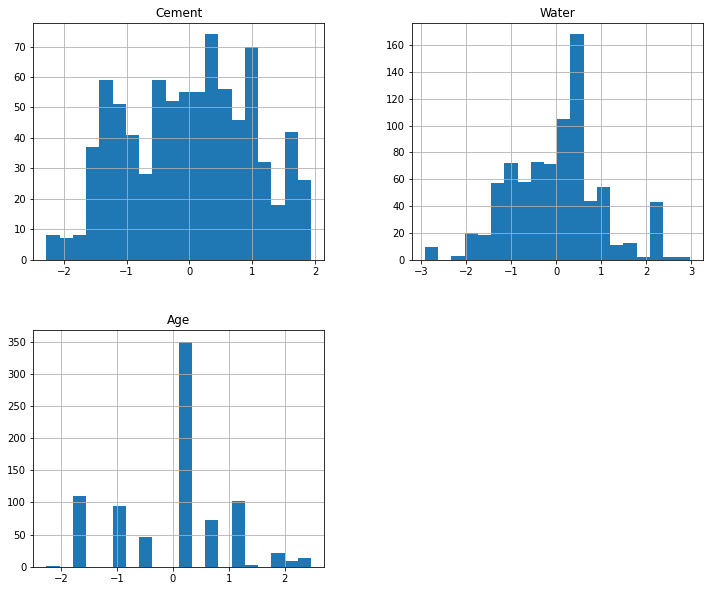

In [20]:
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=X_train.columns)
X_train_transformed_df.hist(figsize=(12,10),bins=20)

# Train Model With Power Transformer

In [13]:
model = LinearRegression()

model.fit(X_train_transformed, y_train)

y_pred = model.predict(X_test_transformed)
r2_score(y_test, y_pred)

np.float64(0.6719832809741015)